In [1]:
using FileIO
using CUDA
using CUDA.CUFFT
using Plots
using StatsBase

In [2]:
w(x) = reshape(x,128,125);
g(x) = CuArray(x);
ℱ(x) = rfft(x,1);
invℱ(x) = irfft(x,128,1);
H(x) = heatmap(collect(x));
interleave(c,s) = reshape(cat(c,s,dims=1),size(c,1),2*size(c,2));
deinterleave(x) = x[:,1:2:end] + 1im*x[:,2:2:end];
mse(x,x̂) = mean( (x-x̂) .^ 2 );
compand(x) = 0.125 * sign.(x) .* log.(1 .+ abs.(256*x));
express(x) = (1/256)* sign.(x) .* (exp.(8.0*abs.(x)) .- 1);

In [3]:
x = load("data/mini_speech_commands/down/004ae714_nohash_0.wav")
x₀ = Float32.(collect(x[:]));
x₀ = x₀ .- mean(x₀);

In [4]:
@time CUDA.@time begin
    𝐗 = (ℱ ∘ w ∘ g)(x₀);
    J = interleave(real(𝐗),imag(𝐗));
    Jₚ = express(round.(8*compand(J))/8);
    x̂ = collect((invℱ ∘ deinterleave)(Jₚ)[:])
end;

 42.930908 seconds (77.77 M CPU allocations: 3.962 GiB, 2.79% gc time) (26 GPU allocations: 2.537 MiB, 0.03% memmgmt time)
 43.998297 seconds (78.79 M allocations: 4.013 GiB, 2.72% gc time, 49.82% compilation time: 1% of which was recompilation)


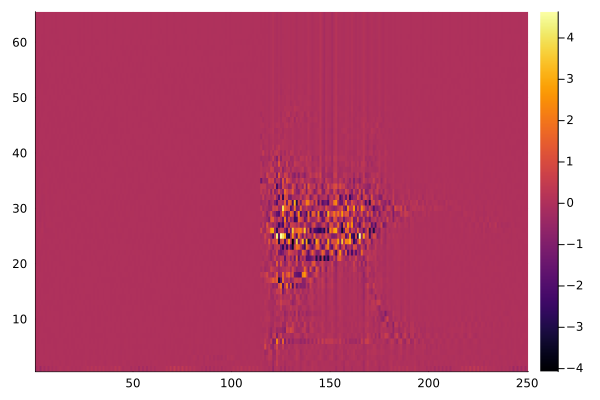

In [11]:
heatmap(collect(J))

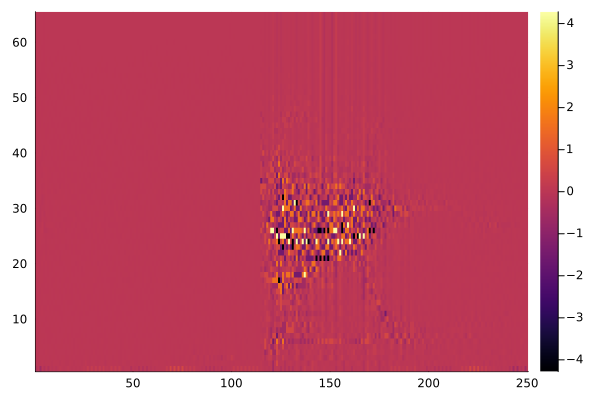

In [12]:
heatmap(collect(Jₚ))

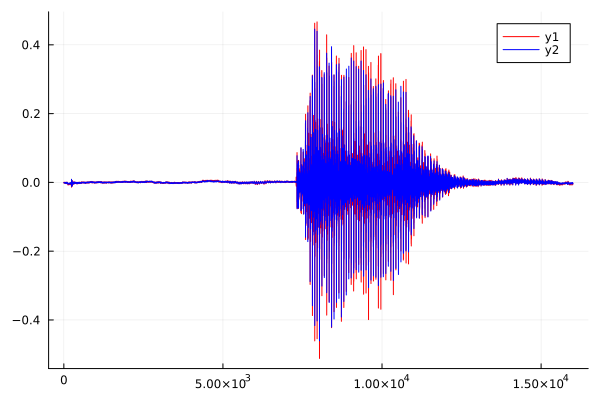

In [5]:
plot(x̂,c=:red)
plot!(x₀,c=:blue)

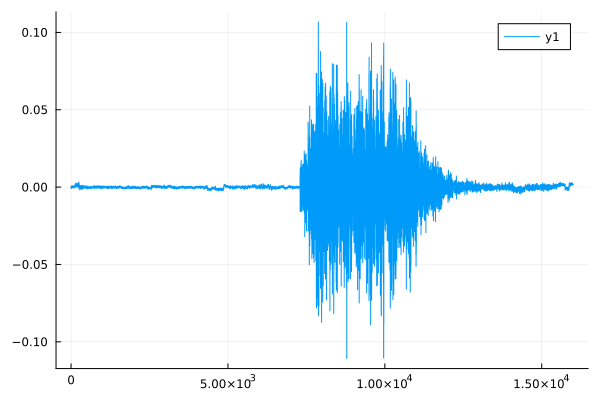

In [6]:
plot(x₀-x̂)

In [7]:
mse(x₀, x̂)

0.0001734972869584152

In [8]:
x̂₂ = express(round.(2*compand(x₀))/2);

In [9]:
mse(x₀, x̂₂)

0.0032788523511096557